<a href="https://colab.research.google.com/github/sietske-dk/sietske-dk/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASKS:
- Find 3 papers related to this topic. For instance look for papers using the MNIST dataset. Create a short introduction referencing these papers.
- Define three characters from your own name, and draw them in a 5x5 matrix. E.g.if you name is Sieuwert, make SIE, or SUT, … Be unique.
- Create four variations for each character. Make variation one of each character by redrawing it differently, e.g. emphasizing one of the strokes. Variant 2 should be based on slightly blurring the first version. Variant 3 should add some noise to a few pixels of the image. Variant four should combine noise and blurring.
- Make a correlation matrix for your inputs (12 x 12 matrix) by taking inproducts between all input values. How similar are your inputs to each other? Explain from the correlation matrix which two characters are most likely to be confused.
- Create a matrix NN1 to recognise your three characters. It should work on all variations, so perhaps use a combination/average version of the three characters. Make improvements to find best matrix. Try to make it so that the matrix gives an equally high output for each input character, to make comparison easy.
- Test your matrix on all your inputs and show the scores, for instance in bar chart. Evaluate the score: does the correct answer indeed get the highest score? Is the difference between the scores big enough to set a simple threshold value?
- Really test your network: make four or more inputs and use NN1 on it. Find multiple inputs (3 or more) that are not correctly classified. - Check what happens if you input all 1's or all zeros? Try to make an incorrectly classified character by changing only one pixel. Is thsi possible? Can you do it by only changing two pixels? Three pixels?
Find multiple inputs (not all zeros) so that NN1 cannot make a decision: it gives exactly equal values for all characters. Is there a linear algebra based method for finding such inputs? Describe how you can create such counterexamples.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter

# scipy uniform filter

<ipython-input-2-c36f9a5a3753>:3: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


In [ ]:
def plot(char):
  # create visual of the character
  plt.clf()
  plt.imshow(char, cmap='viridis_r')
  plt.title('Character')
  for i in range(5):
      for j in range(5):
          plt.text(j,i,char[i][j].round(2))
  plt.show()

def Gaussian(x, a, b, c):
    return a * np.exp(-(x - b)**2 / (2 * c**2))


def blur(array):
  blurred = gaussian_filter(array, sigma=0.5)
  return blurred

In [ ]:
s = np.array([[1,1,1,1,1],
              [1,0,0,0,0],
              [1,1,1,1,1],
              [0,0,0,0,1],
              [1,1,1,1,1]]).astype(float)

s2 = np.array([[0,0,1,1,0],
               [0,1,0,0,1],
               [0,0,1,0,0],
               [1,0,0,1,0],
               [0,1,1,0,0]]).astype(float)

a = np.array([[0,0,1,0,0],
              [0,1,0,1,0],
              [0,1,1,1,0],
              [1,1,0,1,1],
              [1,0,0,0,1]]).astype(float)

a2 = np.array([[0,1,1,1,0],
               [1,0,0,0,1],
               [1,1,1,1,1],
               [1,0,0,0,1],
               [1,0,0,0,1]]).astype(float)

m = np.array([[1,0,0,0,1],
              [1,1,0,1,1],
              [1,0,1,0,1],
              [1,0,0,0,1],
              [1,0,0,0,1]]).astype(float)

m2 = np.array([[1,0,0,0,1],
               [1,1,0,1,1],
               [1,1,0,1,1],
               [1,0,1,0,1],
               [1,0,1,0,1]]).astype(float)

e = np.array([[1,1,1,1,1],
              [1,0,0,0,0],
              [1,1,1,1,1],
              [1,0,0,0,0],
              [1,1,1,1,1]]).astype(float)

e2 = np.array([[0,1,1,1,0],
               [1,0,0,0,1],
               [0,1,1,0,0],
               [1,0,0,0,1],
               [0,1,1,1,0]]).astype(float)

sBlur = blur(s)

# Create the Gaussian filter
filter = Gaussian(s[0], 1, 0, 1)

# Apply the filter to the data
# filtered_data = np.convolve(s, filter, mode='same')

# plot(sBlur)

# plot(a), plot(a2), plot(s), plot(s2), plot(e), plot(e2), plot(m), plot(m2)

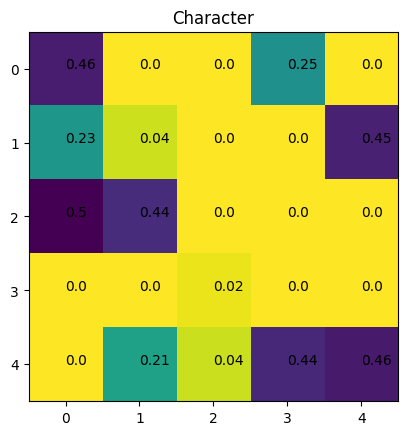

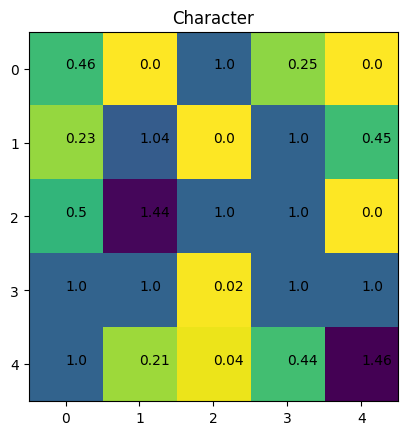

(None, None)

In [ ]:
# blur might need change, but will work for now
s3 = gaussian_filter(s, sigma=0.7)
a3 = gaussian_filter(a, sigma=0.7)
m3 = gaussian_filter(m, sigma=0.7)
e3 = gaussian_filter(e, sigma=0.7)


noise = lambda: np.random.choice(a=[0,1], size=(5,5))*np.random.random(size=(5,5))*0.5
# noise
s4 = s+noise()
a4 = a+noise()
m4 = m+noise()
e4 = e+noise()

# blur + noise
s5 = s3+noise()
a5 = a3+noise()
m5 = m3+noise()
e5 = e3+noise()
an = noise()
plot(an), plot(a+an)